В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = root_mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Learning/ML/cars.csv')
cars.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [ ]:
cars.nunique()

,0
Car_ID,100
Brand,11
Model,58
Year,6
Kilometers_Driven,18
Fuel_Type,2
Transmission,2
Owner_Type,3
Mileage,15
Engine,36


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


# Висновок:
В наборі є 12 колонок - 6 категоріальних і 8 числових.
Детальніше по категоріальним колонкам:
- 2 бінарні (Fuel_type, Transmission)
- 2 мультикатегоріальних (Brand, Model)
- 2 колонки, в яких можна встановити відношення порядку (Seats, Owner_type)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [ ]:
X = cars.drop(columns=['Price'])
y = cars['Price']

In [ ]:
# Розбиття на тренувальні данні і тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=False)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [ ]:
fuel_type_codes = {'Petrol' : 1, 'Diesel' : 0}
cars['is_petrol'] = cars.Fuel_Type.map(fuel_type_codes)

In [ ]:
transmission_codes = {'Manual' :0, 'Automatic':1}
cars['automatic_transmission'] = cars.Transmission.map(transmission_codes)

In [ ]:
cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,is_petrol,automatic_transmission
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,1


In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [ ]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
enc.categories_[0]
X_test[enc.categories_[0]] = one_hot_test
X_train[enc.categories_[0]] = one_hot_train

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
80,81,Tata,Tigor,2018,42000,Diesel,Manual,First,24,1047,69,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
81,82,Maruti,S-Cross,2020,15000,Petrol,Automatic,Second,18,1462,103,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
82,83,Honda,BR-V,2018,28000,Diesel,Manual,First,21,1498,98,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
84,85,Audi,Q7,2017,30000,Diesel,Automatic,First,14,2967,245,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [ ]:
X_train_num = X_train.select_dtypes(include = ['number'])

In [ ]:
train_data = pd.concat([X_train_num, y_train], axis=1)

In [ ]:
train_corr_matrix = train_data.corr()
print(train_corr_matrix)

                     Car_ID          Year  Kilometers_Driven   Mileage  \
Car_ID             1.000000  5.704786e-02          -0.232330 -0.010697   
Year               0.057048  1.000000e+00          -0.721650  0.219802   
Kilometers_Driven -0.232330 -7.216502e-01           1.000000 -0.129893   
Mileage           -0.010697  2.198023e-01          -0.129893  1.000000   
Engine            -0.022984 -3.280046e-01           0.091528 -0.665458   
Power              0.017669 -3.002138e-01          -0.002373 -0.629507   
Seats             -0.040167 -2.114174e-01           0.414480 -0.215616   
Audi               0.018044 -3.187164e-01           0.129651 -0.134958   
BMW                0.032478  1.770647e-01          -0.237619 -0.048288   
Ford               0.005996 -7.985209e-02          -0.047420 -0.223498   
Honda             -0.070442 -8.229222e-02           0.126476  0.421030   
Hyundai            0.023127 -7.985209e-02           0.095419  0.258470   
Mahindra          -0.032288  2.681014e

In [ ]:
# Лишимо кореляцію лише для цільової змінної і лише потрібний проміжок
train_target_cor = train_corr_matrix['Price'].drop('Price')
strong_corr_train = train_target_cor[abs(train_target_cor) > 0.5]
print(strong_corr_train)

Mileage   -0.572906
Engine     0.697522
Power      0.858612
Name: Price, dtype: float64


## **Висновок**
Найбільш стійку позитивну кореляцію ціна на авто має з типом мотору (Engine) та потужністю (Power). Негативну кореляцію має з пробігом авто (Mileage).

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [ ]:
X_test_num = X_test.select_dtypes(include = ['number'])

In [ ]:
# Тренування моделі
inputs, targets = X_train_num, y_train
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = root_mean_squared_error(targets, predictions)
print('Loss:', loss)

Loss: 251004.80147743388


In [ ]:
#Передбачення на X_test
predictions_test = model.predict(X_test_num)
loss_test = root_mean_squared_error(y_test, predictions_test)
print('Loss test:'), loss_test

Loss test:


(None, 265221.26832960354)

In [ ]:
# функція для графіку
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Лінія ідеального прогнозу
    plt.xlabel('Реальні значення')
    plt.ylabel('Передбачені значення')
    plt.title(title)
    plt.grid(True)
    plt.show()


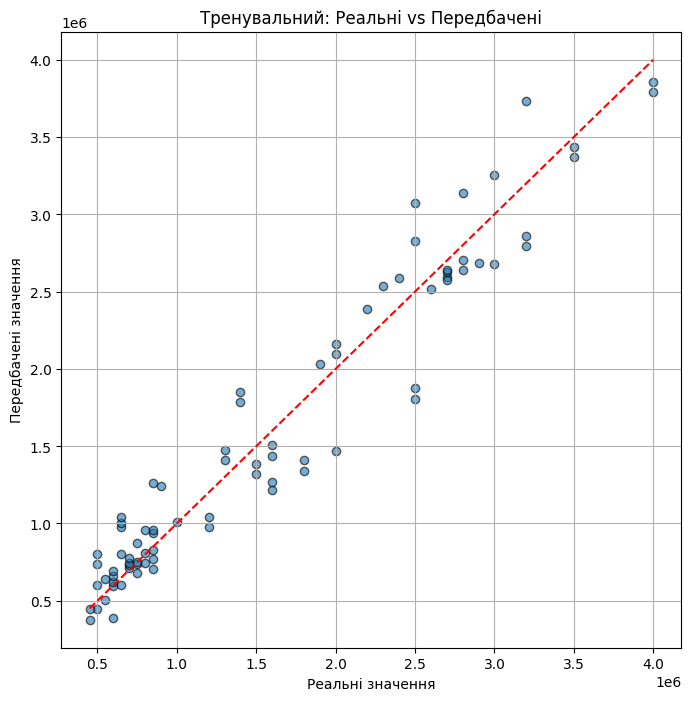

In [ ]:
# графік розсіювання для тренувальної моделі
plot_predictions(y_train, predictions, "Тренувальний: Реальні vs Передбачені")

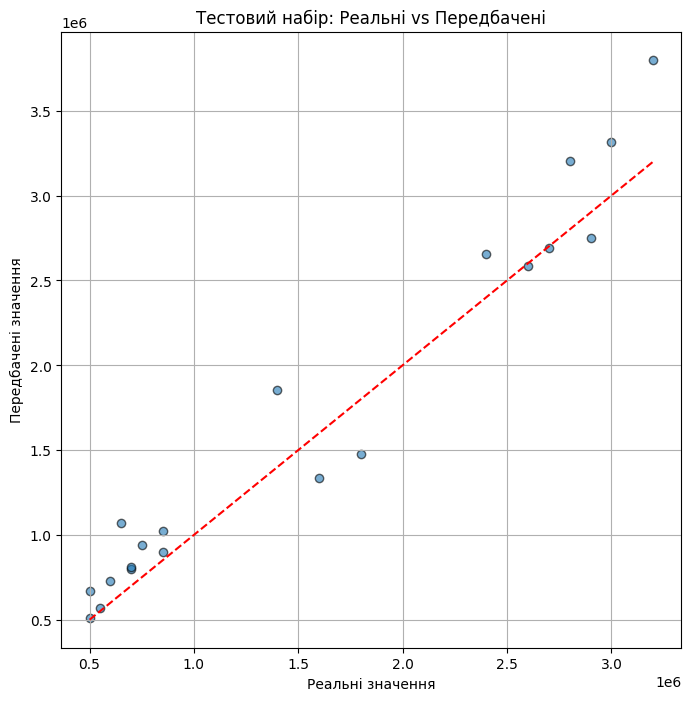

In [ ]:
# графік розсіювання для тестової моделі
plot_predictions(y_test, predictions_test, "Тестовий набір: Реальні vs Передбачені")

## **Висновок**
Незважаючи на те, що модель на тестовому наборі дала меншу помилку, ніж на тренувальному, все одно сама помилка дуже велика. Також бачимо на графіках, що дані обох передбачень далекі від реальних, тобто модель не вловила взаємов'язки аби спрогнозувати коректніше або ж можливо залежності ціноутворення на авто є нелінійними і нам потрібно скористатись іншою моделлю для прогнозування.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns, index=X_train_num.index)

In [ ]:
scaler.mean_

array([4.0500000e+01, 2.0183750e+03, 2.8587500e+04, 1.7112500e+01,
       1.8600875e+03, 1.5705000e+02, 5.2250000e+00, 1.0000000e-01,
       1.0000000e-01, 1.1250000e-01, 6.2500000e-02, 1.1250000e-01,
       5.0000000e-02, 6.2500000e-02, 1.0000000e-01, 1.0000000e-01,
       1.0000000e-01, 1.0000000e-01, 7.0000000e-01])

In [ ]:
scaler.var_

array([5.33250000e+02, 1.38437500e+00, 8.86673438e+07, 1.13248438e+01,
       4.07574630e+05, 5.48322250e+03, 5.49375000e-01, 9.00000000e-02,
       9.00000000e-02, 9.98437500e-02, 5.85937500e-02, 9.98437500e-02,
       4.75000000e-02, 5.85937500e-02, 9.00000000e-02, 9.00000000e-02,
       9.00000000e-02, 9.00000000e-02, 4.85000000e-01])

In [ ]:
X_test_scaled = scaler.transform(X_test_num)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns, index=X_test_num.index)

In [ ]:
y_test_scaled = y_test.copy()
y_train_scaled = y_train.copy()

In [ ]:
# тренуємо модель на scaled даних
model_scaled = LinearRegression().fit(X_train_scaled, y_train_scaled)

In [ ]:
from sklearn.metrics import r2_score
y_pred_train = model_scaled.predict(X_train_scaled)
r2 = r2_score(y_train_scaled, y_pred_train)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9367


In [ ]:
n = X_train_scaled.shape[0]
p = X_train_scaled.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r2:.4f}")

Adjusted R-squared: 0.9166


In [ ]:
# виведемо коефіцієнти моделі
coefficients = model_scaled.coef_
coef_df = pd.DataFrame({'Feature': X_train_num.columns, 'Coefficient': coefficients})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df)

              Feature    Coefficient
5               Power  406188.858458
8                 BMW  280084.828053
14           Mercedes  251706.264368
7                Audi  219245.541811
4              Engine  140923.867523
11            Hyundai -137429.690530
15               Tata -126982.112105
13             Maruti -107380.974051
12           Mahindra -106415.305319
9                Ford -106182.853690
10              Honda  -90580.667067
16             Toyota  -87437.112484
6               Seats   77124.319682
1                Year   50987.972573
3             Mileage  -43265.104832
17         Volkswagen  -42989.397287
0              Car_ID   40280.910679
18   Owner_Type_Codes  -35537.870057
2   Kilometers_Driven   30166.119872


## **Висновок**
Коефіцієнти для потужності авто, типу мотору та року випуску мені здаються логічними. Можливо не до кінця в плані тих розмірностей, які вийшли внаслідок розрахунків моделі, але загалом це ті показники, які впливають на те а скільки дорогим буде авто, так як і марки Mercedes, BMW та Audi (оскільки це авто преміум класу). Можливо не до кінця зрозуміла, але не погоджуюсь щодо від'ємних коефіцієнтів для інших марок - скоріш логічним був би позитивний коефіцієнт, але менший, ніж у преміум авто.
Погоджуюсь з тим, що чим більше власників було, тим нижча ціна буде (фіча Owner_Type_Codes) і також, що чим більше пробіг авто, тим нижча буде ціна (фіча  Mileage). Але чомусь показник Kilometers_Driven дає позитивний коефіцієнт для ціноутворення, що здається нелогічним.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_num.columns, index=X_test.index)


# додамо константу
X_train_scaled_df = sm.add_constant(X_train_scaled_df)
X_test_scaled_df = sm.add_constant(X_test_scaled_df)


In [ ]:
X_test_scaled_df.shape

(20, 20)

In [ ]:
#тренуємо модель (TRAIN)

model_train = sm.OLS(y_train, X_train_scaled_df).fit()
print(model_train.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     50.14
Date:                Sun, 11 May 2025   Prob (F-statistic):           9.22e-30
Time:                        13:53:35   Log-Likelihood:                -1108.2
No. Observations:                  80   AIC:                             2254.
Df Residuals:                      61   BIC:                             2300.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.579e+06   3.21e+0

In [ ]:
results_train = model_train.summary2().tables[1]
significant_coeffs = results_train[results_train['P>|t|'] <= 0.05]
print(significant_coeffs)

                 Coef.      Std.Err.          t         P>|t|        [0.025  \
const     1.579375e+06  32137.871629  49.143734  9.022634e-51  1.515111e+06   
Power     4.061889e+05  81095.945785   5.008744  4.973852e-06  2.440275e+05   
Audi      2.192455e+05  36227.929268   6.051838  9.561909e-08  1.468033e+05   
BMW       2.800848e+05  34539.679725   8.109074  2.855844e-11  2.110185e+05   
Ford     -1.061829e+05  33689.212098  -3.151835  2.515459e-03 -1.735486e+05   
Honda    -9.058067e+04  37042.567329  -2.445313  1.737466e-02 -1.646519e+05   
Hyundai  -1.374297e+05  33398.747128  -4.114816  1.180849e-04 -2.042146e+05   
Mahindra -1.064153e+05  35264.818834  -3.017605  3.713849e-03 -1.769317e+05   
Maruti   -1.073810e+05  32917.177862  -3.262156  1.812859e-03 -1.732029e+05   
Mercedes  2.517063e+05  35461.064176   7.098102  1.571623e-09  1.807975e+05   
Tata     -1.269821e+05  36612.798259  -3.468244  9.666177e-04 -2.001939e+05   
Toyota   -8.743711e+04  35997.614231  -2.428970  1.8

In [ ]:
# тренуємо модель (TEST)
model_test = sm.OLS(y_test, X_test_scaled_df).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     8.980
Date:                Sun, 11 May 2025   Prob (F-statistic):              0.258
Time:                        13:53:35   Log-Likelihood:                -253.48
No. Observations:                  20   AIC:                             545.0
Df Residuals:                       1   BIC:                             563.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.195e+04   2.76e+0

## **Висновок**

Для тренувальних даних статзначущі коефіцієнти:

Power     
Audi     
BMW       
Ford     
Honda    
Hyundai  
Mahindra

Maruti

Mercedes

Tata    
Toyota

І хоч з Power я погоджусь, а також тим, що модель авто має значення, однак окрім цього, як мені здається, є інші суттєві параметри, які б мали б впливати на ціноутворення, однак згідно результатів моделі ці параметри не є статзначущими.


На тестових даних жоден коефіцієнт не є статзначущим. Або я щось зробила невірно в обчисленнях, або в тестових даних є інформація, якої не було в тренувальних і модель спрацювала інакше.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [ ]:
value_cols = ['Power', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota']
# відфільртровую лише потрібні стовпчики з тестового та тренувального наборів:
X_train_val = X_train_scaled_df[value_cols]
X_test_val = X_test_scaled_df[value_cols]


#тренуємо TRAIN дані
model_train_val = sm.OLS(y_train, X_train_val).fit()
print(model_train_val.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.145
Method:                 Least Squares   F-statistic:                              2.232
Date:                Sun, 11 May 2025   Prob (F-statistic):                      0.0220
Time:                        13:53:35   Log-Likelihood:                         -1256.6
No. Observations:                  80   AIC:                                      2535.
Df Residuals:                      69   BIC:                                      2561.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# TEST data

model_test_val = sm.OLS(y_test, X_test_val).fit()
print(model_test_val.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):             -0.434
Method:                 Least Squares   F-statistic:                             0.4494
Date:                Sun, 11 May 2025   Prob (F-statistic):                       0.894
Time:                        13:53:35   Log-Likelihood:                         -312.49
No. Observations:                  20   AIC:                                      647.0
Df Residuals:                       9   BIC:                                      657.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Висновок
R та R squared значно знизились з 0.97 до 0.3, що говорить про погіршення моделі. Також видно по значенню Prob (F-statistic), що модель погіршилась.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [ ]:
significant_coeffs_twentyfive = results_train[results_train['P>|t|'] <= 0.25]
sign_coeffs_twentyfive = significant_coeffs_twentyfive.index.drop('const').tolist()

In [ ]:
print(sign_coeffs_twentyfive)

['Engine', 'Power', 'Seats', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen']


In [ ]:
X_train_selected_tf = X_train_scaled_df[sign_coeffs_twentyfive]
X_train_selected_tf = sm.add_constant(X_train_selected_tf)
model_tf = sm.OLS(y_train, X_train_selected_tf).fit()

In [ ]:
print(model_tf.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     71.20
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.32e-33
Time:                        14:10:33   Log-Likelihood:                -1110.2
No. Observations:                  80   AIC:                             2248.
Df Residuals:                      66   BIC:                             2282.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.579e+06   3.17e+04     49.855      0.0

##Висновок

Порівняно з показниками моделі завдання 9, цього разу R-squared ближче до 1, що говорить про хороші показники моделі. Також p-value коефіцієнтів в основній масі стат. значимі.

Порівняно з R2 і Adj. R-squared в завданні 7, в поточній моделі вони не значно відрізняються.

Для використання я б лишила модель із завдання 10.